In [1666]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel

# Sklearn ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1667]:
# Initialize k-fold value
k=5
# Initialize variable for first test/train split
test_percent = 1/(k+1)
#test_percent = 0.2
print(test_percent)

# Mahalanobis threshold
m_thresh = 0.05

# Use same random seed to ensure reproducible results across runs
rand_seed = 255

0.16666666666666666


In [1668]:
# Load in dataset
df = pd.read_csv("data/full_dataset.csv")
display(df)

,Unnamed: 0,uid,class,f0,f1,f2,f3,f4,f5,f6,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,0,ZYURRE527,4,0.000462,0.005583,-0.001031,0.002307,-0.113097,-0.284965,0.001069,...,0.680631,-1.153061,0.111816,0.162622,-1.085265,-0.657002,-1.406191,2.240085,0.118616,-0.728013
1,1,ZWNWBP435,0,0.000220,0.006780,-0.000547,0.002183,-0.045820,-0.216762,0.000987,...,-1.241972,-0.115316,-0.411191,0.431461,0.442649,1.243681,-0.151721,0.458508,1.931918,-0.241081
2,2,ZVHEZA963,4,0.000405,0.007183,-0.000137,0.002612,-0.083430,-0.292385,0.001094,...,0.659314,-0.792833,-0.471358,0.514799,-0.846220,0.479314,-0.730218,1.352716,0.040223,-0.163302
3,3,ZSFNU1100,4,0.000388,0.003802,0.002121,0.001513,-0.109248,-0.183284,0.000813,...,-0.047666,-0.201043,-0.565545,0.999009,-0.332314,-0.066972,-1.263785,3.876905,-0.397950,-0.693763
4,4,ZRXUB1049,0,0.000425,0.006544,0.001630,0.001549,-0.068301,-0.283487,0.001004,...,-1.221178,-0.253239,-0.046740,0.242367,-0.379724,-0.893249,-0.957397,1.118245,0.181925,-0.024197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,422,AGHXWX765,0,0.000305,0.003671,-0.004093,0.003010,-0.093583,0.133018,0.000627,...,-0.260746,-0.741712,-0.887129,0.190525,0.216271,0.490549,-1.047399,1.875185,0.345561,-0.874318
423,423,AFEOPC672,3,0.000441,0.006178,-0.000811,0.003572,-0.108863,-0.302020,0.000761,...,0.457373,-0.782917,-1.072765,1.180279,-0.111142,1.897755,-0.902370,0.552967,-0.314270,-1.198762
424,424,AEEEIG737,3,0.000464,0.006611,0.000842,0.001412,-0.152744,-0.355706,0.000906,...,0.411773,0.232481,-0.527885,-0.305296,-0.189008,-0.592684,-1.144780,3.459698,-0.199579,-0.999165
425,425,ADQRPH513,3,0.000233,0.003029,0.001606,0.001224,-0.092386,-0.434045,0.000668,...,-0.147889,1.168724,-0.486698,1.134707,-0.029372,0.092189,-0.791921,1.786787,2.089036,-0.690614


In [1669]:
# Get list of feature names
feature_names = [name for name in df.columns if name.startswith("f")]
#print(feature_names)

### Split Data into Train/Test Sets

In [1670]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_all = df[feature_names]
y_all = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=test_percent, random_state=rand_seed, stratify=y_all
)

# Reset train index
y_train.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

print("Training set by class:")
display(y_train.value_counts())
print("Test set by class:")
display(y_test.value_counts())

Training set by class:


0    132
4     91
3     65
1     45
2     22
Name: class, dtype: int64

Test set by class:


0    27
4    18
3    13
1     9
2     5
Name: class, dtype: int64

### Standardize Data

Use StandardScaler from sklearn. Standardize both X_train and X_test data.

In [1671]:
# Setup scaler
scaler_std = StandardScaler()

# Fit and transform scaling to training data
X_train = scaler_std.fit_transform(X_train)
# Transform testing data using same fit
X_test = scaler_std.transform(X_test)

In [1672]:
# # Get single training DataFrame
# norm_x_df = pd.DataFrame(X_train, columns=feature_names)
# norm_df = pd.concat([y_train, norm_x_df], axis=1)
# # Standardize X_train values
# X_train = norm_data(norm_df[feature_names])

# # Get single testing DataFrame
# norm_xtest_df = pd.DataFrame(X_test, columns=feature_names)
# norm_test_df = pd.concat([y_test, norm_x_df], axis=1)
# # Standardize X_test values (for later)
# X_test = norm_data(norm_test_df[feature_names])

### Remove Outliers

Since we are in multi-dimensional space, we will use the mean and covariance matrices. This will be computed using Mahalanobis distance which is well-suited for multi-dimensional space: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html.

In [1673]:
# Create function that computes mean, cov matrix, and inv cov matrix
def get_mean_cov(X_train):
    # Merge dfs
    norm_x_df = pd.DataFrame(X_train, columns=feature_names)
    norm_df = pd.concat([y_train, norm_x_df], axis=1)
    # Compute mean and cov per class per feature
    avg_list = []
    cov_list = []
    inv_cov_list = []
    for i in range(5):
        # Compute mean
        avg = np.mean(norm_df[norm_df["class"]==i][feature_names], axis=0)
        avg_list.append(avg)
        # Compute cov matrix
        cov = np.cov(norm_df[norm_df["class"]==i][feature_names], rowvar=False)
        cov_list.append(cov)
        # Compute inverse of cov matrix
        inv_cov = np.linalg.inv(cov)
        inv_cov_list.append(inv_cov)
    return norm_df, avg_list, inv_cov_list


In [1674]:
# Test get_mean_cov function
norm_df, avg_list, inv_cov_list = get_mean_cov(X_train)

In [1675]:
# Determine which features should be removed (identify outliers based on Mahalanobis dist)
# Create function that computes Mahalanobis distance and adds it to norm_df
def get_mahalanobis_dist(label, features):
    u = avg_list[label]
    v = features
    vi = inv_cov_list[label]
    delta = u - v
    m = np.dot(np.dot(delta, vi), delta)
    #dist = distance.mahalanobis(u, features, vi)
    return np.sqrt(np.abs(m))

# Call function for each feature
norm_df["mahalanobis_dist"] = norm_df.apply(lambda row: get_mahalanobis_dist(int(row["class"]), row[feature_names]), axis=1)
norm_df["mahalanobis_dist"].describe()

count    355.000000
mean      39.703241
std       34.716815
min        1.786194
25%       20.046636
50%       32.068333
75%       45.081983
max      280.206962
Name: mahalanobis_dist, dtype: float64

In [1676]:
# Drop outliers
def drop_outliers(norm_df, threshold):
    # Remove threshold% of outliers by class
    for i in range(5):
        # Get threshold% of outliers for each class
        threshold_num = norm_df[norm_df["class"]==i]["mahalanobis_dist"].quantile(1-threshold)
        # Drop threshold% of outliers for each class
        norm_df = norm_df.drop(norm_df[norm_df["class"]==i][norm_df["mahalanobis_dist"]>threshold_num].index)        
    return norm_df

In [1677]:
# Test drop_outliers function
norm_df = drop_outliers(norm_df, m_thresh)

# Print updated descriptive stats
norm_df["mahalanobis_dist"].describe()
#print(len(norm_df["class"]))

C:\Users\heath\AppData\Local\Temp\ipykernel_14752\977542497.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  norm_df = norm_df.drop(norm_df[norm_df["class"]==i][norm_df["mahalanobis_dist"]>threshold_num].index)


count    317.000000
mean      35.730002
std       29.414170
min        1.786194
25%       18.827374
50%       30.422501
75%       41.279958
max      205.869203
Name: mahalanobis_dist, dtype: float64

In [1678]:
# Update X_train and y_train
X_train = norm_df[feature_names]
y_train = norm_df["class"]

### Oversample Data

Use ADASYN technique.

In [1679]:
# Create function that oversamples or undersamples data
def resample(sampler, X_train, y_train, name):
    X_train, y_train = sampler.fit_resample(X_train, y_train)
    # Observe number of classes after resample
    #print(f"Number of samples per class after {name}:\n{y_train.value_counts()}")
    return X_train, y_train

In [1680]:
# Test resample function
# Setup ADASYN (oversampling)
ada = ADASYN(random_state=rand_seed, sampling_strategy="minority", n_neighbors=4)

# Call resample function
X_train, y_train = resample(ada, X_train, y_train, "ADASYN Oversampling")

In [1681]:
print(X_train.shape)
print(y_train.value_counts())

(411, 1024)
0    118
2    113
4     82
3     58
1     40
Name: class, dtype: int64


### Feature Selection

In [1691]:
# List from Azure ML Designer (Filter Based Feature Selection)
azureml_features = pd.read_csv("outputs/feature_selection/azureml_designer_features.csv", header=None)
# List from recursive feature elimination w/ and w/o cross-validation
rfe_features = pd.read_csv("outputs/feature_selection/CommonFeatures_RFE_RFECV.csv", header=None)

rfe_features = rfe_features[0].to_numpy()
#display(rfe_features)
azureml_features = azureml_features[0].to_numpy()
# display(azureml_features)

# Get out common features
common_features = np.union1d(azureml_features, rfe_features)
extracted_feature_names = [f"f{i}" for i in common_features]
#print(extracted_feature_names)
#display(extracted_feature_names)
print(np.count_nonzero(common_features))

423


In [1683]:
# Get training dataset with only
# the subset of features included
X_train = X_train[extracted_feature_names]
#print(X_train)

# Get testing dataset wiuth only
# the subset of features included
X_test = pd.DataFrame(X_test, columns=feature_names)
X_test = X_test[extracted_feature_names]
#print(X_test)

### Hyperparameter Tuning

In [1684]:
# Setup parameters to try
c_range = np.arange(5,4000)
params = {
    'C': c_range,
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Setup classifier
svm = SVC(random_state=rand_seed)
# Configure random search from sklearn
svm_clf = RandomizedSearchCV(svm, params, scoring='f1_macro', cv=k, random_state=rand_seed)
# Perform hyperparameter search
search = svm_clf.fit(X_train, y_train)

# Get best hyperparameters
best_params = search.best_params_

In [1685]:
print(best_params)
#display(search.cv_results_)

hyperparam_results_df = pd.DataFrame(search.cv_results_)
display(hyperparam_results_df)

{'kernel': 'linear', 'gamma': 'auto', 'C': 382}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083894,0.006276,0.027786,0.001236,rbf,auto,721,"{'kernel': 'rbf', 'gamma': 'auto', 'C': 721}",0.570569,0.625570,0.599652,0.491361,0.644431,0.586316,0.053592,3
1,0.082976,0.002420,0.029653,0.001053,rbf,scale,303,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 303}",0.579731,0.639471,0.599652,0.441383,0.644431,0.580933,0.073871,6
2,0.080674,0.002423,0.028028,0.000743,rbf,auto,1596,"{'kernel': 'rbf', 'gamma': 'auto', 'C': 1596}",0.570569,0.625570,0.599652,0.491361,0.644431,0.586316,0.053592,3
3,0.081617,0.002910,0.028275,0.001208,rbf,scale,931,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 931}",0.579731,0.639471,0.599652,0.441383,0.644431,0.580933,0.073871,6
4,0.067963,0.001854,0.023392,0.001183,linear,auto,382,"{'kernel': 'linear', 'gamma': 'auto', 'C': 382}",0.629713,0.623214,0.589308,0.545775,0.631144,0.603831,0.032781,1
5,0.082542,0.001070,0.029702,0.002642,rbf,scale,2022,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 2022}",0.579731,0.639471,0.599652,0.441383,0.644431,0.580933,0.073871,6
6,0.080953,0.003389,0.029475,0.001829,rbf,auto,2352,"{'kernel': 'rbf', 'gamma': 'auto', 'C': 2352}",0.570569,0.625570,0.599652,0.491361,0.644431,0.586316,0.053592,3
7,0.081629,0.001906,0.029898,0.002522,rbf,scale,650,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 650}",0.579731,0.639471,0.599652,0.441383,0.644431,0.580933,0.073871,6
8,0.081791,0.000984,0.028992,0.001583,rbf,scale,3159,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 3159}",0.579731,0.639471,0.599652,0.441383,0.644431,0.580933,0.073871,6
9,0.069698,0.004156,0.030826,0.015196,linear,auto,1969,"{'kernel': 'linear', 'gamma': 'auto', 'C': 1969}",0.629713,0.623214,0.589308,0.545775,0.631144,0.603831,0.032781,1


In [1686]:
def analyze_classifier_with_k_folds(classifier, n_splits=5, random_state=rand_seed):
    classifiers = []
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        classifier.fit(X_train_fold, y_train_fold)
        classifiers.append(classifier)

        y_pred = classifier.predict(X_test_fold)

        accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
        f1_scores.append(f1_score(y_test_fold, y_pred, average="macro"))
        precision_scores.append(
            precision_score(y_test_fold, y_pred, average="macro")
        )
        recall_scores.append(recall_score(y_test_fold, y_pred, average="macro"))

    return classifiers, {
        "accuracy": pd.Series(accuracy_scores).describe().to_dict(),
        "f1": pd.Series(f1_scores).describe().to_dict(),
        "precision": pd.Series(precision_scores).describe().to_dict(),
        "recall": pd.Series(recall_scores).describe().to_dict(),
    }


In [1687]:
svm_final_clf = SVC(**best_params, random_state=rand_seed)
analyze_classifier_with_k_folds(svm_final_clf, n_splits=k)

([SVC(C=382, gamma='auto', kernel='linear', random_state=255),
  SVC(C=382, gamma='auto', kernel='linear', random_state=255),
  SVC(C=382, gamma='auto', kernel='linear', random_state=255),
  SVC(C=382, gamma='auto', kernel='linear', random_state=255),
  SVC(C=382, gamma='auto', kernel='linear', random_state=255)],
 {'accuracy': {'count': 5.0,
   'mean': 0.6886276814575375,
   'std': 0.038405809373713,
   'min': 0.6463414634146342,
   '25%': 0.6626506024096386,
   '50%': 0.6829268292682927,
   '75%': 0.7073170731707317,
   'max': 0.7439024390243902},
  'f1': {'count': 5.0,
   'mean': 0.621788422671802,
   'std': 0.04575224813701675,
   'min': 0.5879750433897899,
   '25%': 0.5978479853479853,
   '50%': 0.6074709456656426,
   '75%': 0.6139238539238538,
   'max': 0.7017242850317384},
  'precision': {'count': 5.0,
   'mean': 0.6462865021701604,
   'std': 0.05053383449166561,
   'min': 0.5842307692307693,
   '25%': 0.6281379310344828,
   '50%': 0.6398757763975155,
   '75%': 0.656111111111111

### Get Final Model

In [1688]:
# Fit model using best hyperparameters found in previous search
svm_final_clf = SVC(**best_params, random_state=rand_seed)
svm_model_final = svm_final_clf.fit(X_train, y_train)

y_pred = svm_model_final.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {acc:.4f}")
print(f"F1 macro score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.4861
F1 macro score: 0.5130
Precision: 0.5608
Recall: 0.4989


### Use Meta Learning!

In addition to the svm classifier above (svm), we'll use the VotingClassifier() from sklearn which takes multiple estimators as input, and implements a voting procedure. We will use the following classifiers:

- SVM (already created)
- Naive Bayes
- kNN, k=5
- Decision Tree, max depth = 8
- Logistic Regression

In [1695]:
# Create all the classifiers!
# Naive Bayes
nb_clf = GaussianNB()

# kNN, k=5
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Decision tree, max depth=8
dt_clf = DecisionTreeClassifier(random_state=rand_seed, max_depth=8)

# Logistic regression
lr_clf = LogisticRegression(random_state=rand_seed, max_iter=1000)

In [1696]:
# Put them to a vote!
ensemble_clf = VotingClassifier(estimators=[
    ('svm', svm), ('nb', nb_clf), ('knn', knn_clf),
    ('dt', dt_clf), ('lr', lr_clf)], voting='hard'
)

# Fit and predict with voting classifier
ensemble_clf = ensemble_clf.fit(X_train, y_train)
ensemble_pred = ensemble_clf.predict(X_test)

# Get metrics
ensemble_acc = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred, average="macro")
ensemble_precision = precision_score(y_test, ensemble_pred, average="macro")
ensemble_recall = recall_score(y_test, ensemble_pred, average="macro")

print(f"Ensemble accuracy: {ensemble_acc:.4f}")
print(f"Ensemble F1 macro score: {ensemble_f1:.4f}")
print(f"Ensemble precision: {ensemble_precision:.4f}")
print(f"Ensemble recall: {ensemble_recall:.4f}")

Ensemble accuracy: 0.5417
Ensemble F1 macro score: 0.5478
Ensemble precision: 0.6044
Ensemble recall: 0.5254


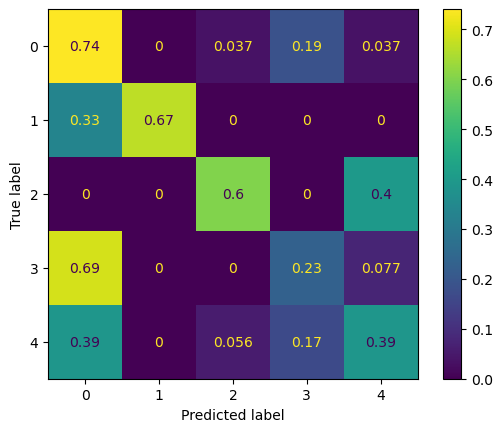

In [1697]:
# Confusion matrix
cm = confusion_matrix(y_test, ensemble_pred, normalize="true")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()